In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_names = []
for i in range(1, 11):
    item = 'load_stimulus_exp{}.csv'.format(i)
    file_names.append(item)

folder_path = os.path.abspath(os.path.join("../datasets"))
load_stimulus_global = pd.DataFrame()

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    load_stimulus_global = pd.concat([load_stimulus_global, df], ignore_index=True)

# Save the combined DataFrame as a new CSV file
abs_path = os.path.join("..\\datasets", 'load_stimulus_global.csv')
load_stimulus_global.to_csv(abs_path, index=False)


In [64]:
current_dir = os.getcwd()

exp_ls = "load_stimulus_global.csv"
#exp_ls="load_stimulus_exp1.csv"
file_path = os.path.abspath(os.path.join("..\\datasets", exp_ls))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 177
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          1776 non-null   float64
 1   output_rate                         1776 non-null   float64
 2   latency                             1776 non-null   float64
 3   firewall_instructions               1776 non-null   float64
 4   nf_router_instructions              1776 non-null   float64
 5   ndpi_stats_instructions             1776 non-null   float64
 6   payload_scan_instructions           1776 non-null   float64
 7   bridge_instructions                 1776 non-null   float64
 8   firewall_branches                   1776 non-null   float64
 9   nf_router_branches                  1776 non-null   float64
 10  ndpi_stats_branches                 1776 non-null   float64
 11  payload_scan_branches               1776 non

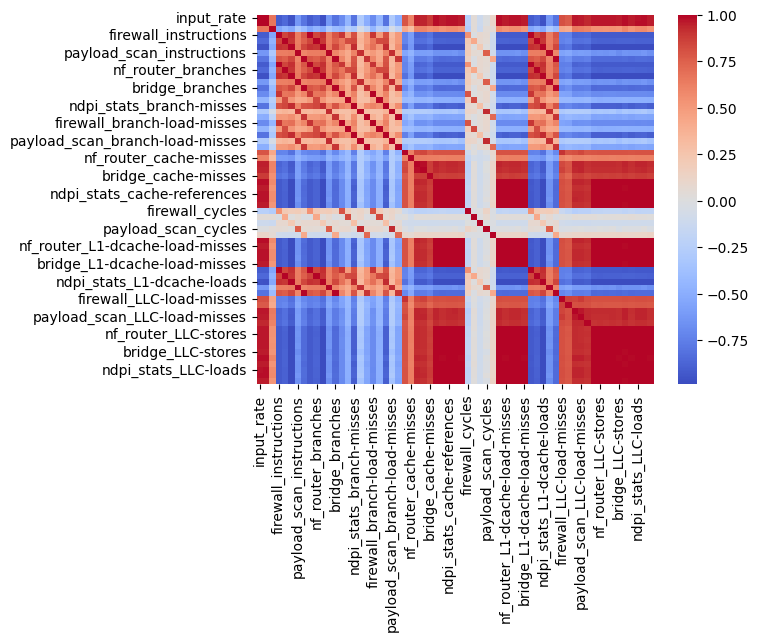

In [65]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.show()

In [66]:
# Reset the index starting from 0
data = data.reset_index(drop=True)
data

,input_rate,output_rate,latency,firewall_instructions,nf_router_instructions,ndpi_stats_instructions,payload_scan_instructions,bridge_instructions,firewall_branches,nf_router_branches,...,firewall_LLC-stores,nf_router_LLC-stores,ndpi_stats_LLC-stores,payload_scan_LLC-stores,bridge_LLC-stores,firewall_LLC-loads,nf_router_LLC-loads,ndpi_stats_LLC-loads,payload_scan_LLC-loads,bridge_LLC-loads
0,181.474121,179.921996,8.679,1.117959e+10,1.102160e+10,1.087146e+10,1.109500e+10,1.110628e+10,2.206764e+09,2.175708e+09,...,875144.0,1063075.0,610850.0,626833.0,922217.0,1424217.0,2261436.0,1264851.0,1148126.0,1500316.0
1,517.457373,528.279743,6.281,1.119058e+10,1.102026e+10,1.101201e+10,1.100837e+10,1.109325e+10,2.205033e+09,2.171729e+09,...,886651.0,1069079.0,596189.0,667640.0,929514.0,1423147.0,2265829.0,1245090.0,1288479.0,1601767.0
2,528.169756,528.187403,7.705,1.109795e+10,1.093178e+10,1.092948e+10,1.122279e+10,1.113196e+10,2.192220e+09,2.160151e+09,...,916192.0,1100754.0,620103.0,687316.0,962373.0,1462270.0,2350545.0,1289946.0,1303597.0,1636045.0
3,528.444441,528.433404,9.798,1.110786e+10,1.095032e+10,1.103463e+10,1.122228e+10,1.113203e+10,2.193698e+09,2.163060e+09,...,911639.0,1087845.0,611194.0,680662.0,964289.0,1469410.0,2356446.0,1292102.0,1290498.0,1633125.0
4,528.280767,528.277503,7.143,1.101574e+10,1.040668e+10,1.093372e+10,1.115132e+10,1.113586e+10,2.181095e+09,2.066673e+09,...,889768.0,1086770.0,626365.0,677836.0,938134.0,1435182.0,2296306.0,1277732.0,1317718.0,1601257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,528.382361,528.360435,8.951,1.119749e+10,1.093725e+10,1.113631e+10,1.122062e+10,1.113351e+10,2.181404e+09,2.160928e+09,...,915969.0,1109141.0,628313.0,673869.0,935762.0,1412887.0,2306275.0,1282412.0,1271834.0,1591485.0
1772,528.358570,528.404191,6.819,1.119064e+10,1.081129e+10,1.113261e+10,1.109375e+10,1.085941e+10,2.192747e+09,2.141795e+09,...,908281.0,1069650.0,620807.0,671821.0,943392.0,1447111.0,2316608.0,1288483.0,1297674.0,1599919.0
1773,528.273381,528.252150,6.775,1.119923e+10,1.092716e+10,1.113741e+10,1.121387e+10,1.112382e+10,2.190129e+09,2.159333e+09,...,893301.0,1067121.0,631102.0,668744.0,950897.0,1419509.0,2324016.0,1266560.0,1267027.0,1572100.0
1774,528.350337,528.356604,6.435,1.119992e+10,1.087010e+10,1.097359e+10,1.118948e+10,1.097643e+10,2.207054e+09,2.151105e+09,...,917349.0,1084204.0,626326.0,669265.0,943385.0,1437934.0,2330222.0,1280494.0,1288688.0,1584614.0


<Axes: >

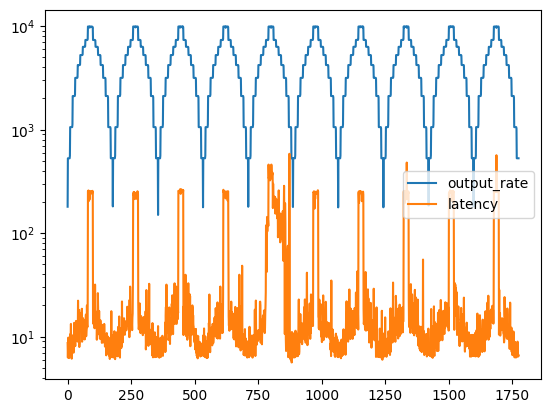

In [71]:
data.iloc[:, 1:3].plot(logy=True)

In [72]:
corr = data.corr()
correlation_list = []
for i in range(1,2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and firewall_LLC-loads: 0.98
Correlation between output_rate and firewall_cache-references: 0.98
Correlation between output_rate and firewall_L1-dcache-load-misses: 0.98
Correlation between output_rate and payload_scan_LLC-loads: 0.98
Correlation between output_rate and ndpi_stats_LLC-loads: 0.98
Correlation between output_rate and ndpi_stats_L1-dcache-load-misses: 0.97
Correlation between output_rate and payload_scan_cache-references: 0.97
Correlation between output_rate and payload_scan_L1-dcache-load-misses: 0.97
Correlation between output_rate and ndpi_stats_cache-references: 0.97
Correlation between output_rate and nf_router_LLC-stores: 0.97
Correlation between output_rate and payload_scan_LLC-stores: 0.97
Correlation between output_rate and firewall_LLC-stores: 0.96
Correlation between output_rate and ndpi_stats_LLC-load-misses: 0.96
Correlation between output_rate and ndpi_stats_LLC-stores: 0.96
Correlation between output_rate and nf_router_L1-dca

In [73]:
# Resource stimulus

In [74]:
resouce_stimulus_global = pd.DataFrame()
file_names = []

for i in range(3, 8):
    for j in [1,3]:
        for k in range(1,6):
            item = 'resource_stimulus_exp-{}-{}-{}.csv'.format(i,j,k)
            file_names.append(item)

file_names.remove('resource_stimulus_exp-3-1-1.csv')
print(file_names)

folder_path = os.path.abspath(os.path.join("../datasets"))
resource_stimulus_global = pd.DataFrame()

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    resource_stimulus_global = pd.concat([resource_stimulus_global, df], ignore_index=True)

# Save the combined DataFrame as a new CSV file
abs_path = os.path.join("..\\datasets", 'resource_stimulus_global.csv')
resource_stimulus_global.to_csv(abs_path, index=False)

['resource_stimulus_exp-3-1-2.csv', 'resource_stimulus_exp-3-1-3.csv', 'resource_stimulus_exp-3-1-4.csv', 'resource_stimulus_exp-3-1-5.csv', 'resource_stimulus_exp-3-3-1.csv', 'resource_stimulus_exp-3-3-2.csv', 'resource_stimulus_exp-3-3-3.csv', 'resource_stimulus_exp-3-3-4.csv', 'resource_stimulus_exp-3-3-5.csv', 'resource_stimulus_exp-4-1-1.csv', 'resource_stimulus_exp-4-1-2.csv', 'resource_stimulus_exp-4-1-3.csv', 'resource_stimulus_exp-4-1-4.csv', 'resource_stimulus_exp-4-1-5.csv', 'resource_stimulus_exp-4-3-1.csv', 'resource_stimulus_exp-4-3-2.csv', 'resource_stimulus_exp-4-3-3.csv', 'resource_stimulus_exp-4-3-4.csv', 'resource_stimulus_exp-4-3-5.csv', 'resource_stimulus_exp-5-1-1.csv', 'resource_stimulus_exp-5-1-2.csv', 'resource_stimulus_exp-5-1-3.csv', 'resource_stimulus_exp-5-1-4.csv', 'resource_stimulus_exp-5-1-5.csv', 'resource_stimulus_exp-5-3-1.csv', 'resource_stimulus_exp-5-3-2.csv', 'resource_stimulus_exp-5-3-3.csv', 'resource_stimulus_exp-5-3-4.csv', 'resource_stimulus_

In [75]:
current_dir = os.getcwd()

exp_rs = "resource_stimulus_global.csv"

file_path = os.path.abspath(os.path.join("..\\datasets", exp_rs))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 45
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          2229 non-null   float64
 1   output_rate                         2229 non-null   float64
 2   latency                             2229 non-null   float64
 3   firewall_instructions               2229 non-null   float64
 4   nf_router_instructions              2229 non-null   float64
 5   ndpi_stats_instructions             2229 non-null   float64
 6   payload_scan_instructions           2229 non-null   float64
 7   bridge_instructions                 2229 non-null   float64
 8   firewall_branches                   2229 non-null   float64
 9   nf_router_branches                  2229 non-null   float64
 10  ndpi_stats_branches                 2229 non-null   float64
 11  payload_scan_branches               2229 non-

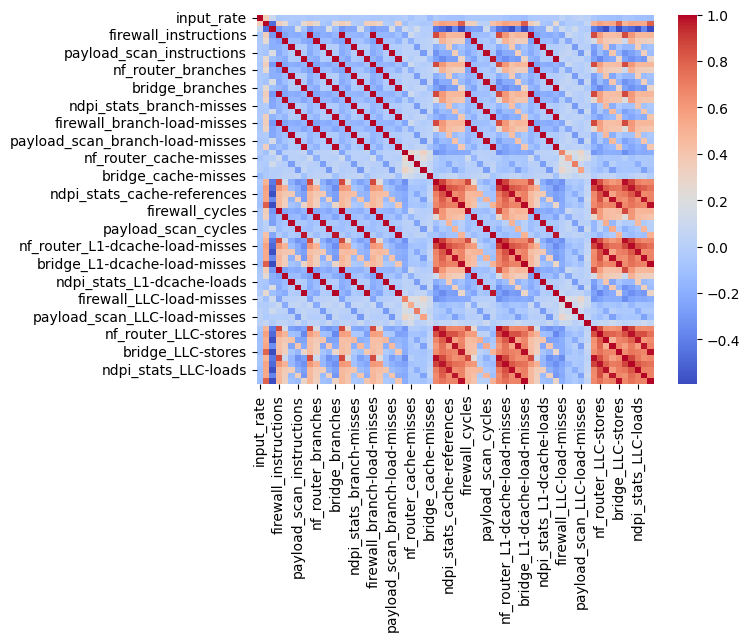

In [76]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.show()

In [77]:
# Reset the index starting from 0
data = data.reset_index(drop=True)
data

,input_rate,output_rate,latency,firewall_instructions,nf_router_instructions,ndpi_stats_instructions,payload_scan_instructions,bridge_instructions,firewall_branches,nf_router_branches,...,firewall_LLC-stores,nf_router_LLC-stores,ndpi_stats_LLC-stores,payload_scan_LLC-stores,bridge_LLC-stores,firewall_LLC-loads,nf_router_LLC-loads,ndpi_stats_LLC-loads,payload_scan_LLC-loads,bridge_LLC-loads
0,436.823458,400.853155,176.230,9.900353e+09,9.560911e+09,9.972569e+09,9.885644e+09,9.369255e+09,1.970474e+09,1.899400e+09,...,3134906.0,4454949.0,2481271.0,2497825.0,3175684.0,5411746.0,6347967.0,4811241.0,6752599.0,7266488.0
1,1870.254001,2052.726907,122.137,1.010218e+10,9.650968e+09,1.009861e+10,9.882438e+09,9.507453e+09,1.978642e+09,1.910916e+09,...,3137269.0,4417897.0,2467347.0,2499943.0,3179734.0,5362879.0,6343633.0,4801184.0,6741622.0,7289259.0
2,2113.207078,2109.246838,124.307,1.010213e+10,9.519983e+09,9.979698e+09,9.875597e+09,9.503650e+09,1.960162e+09,1.891184e+09,...,3127101.0,4548304.0,2544815.0,2477423.0,3165772.0,5474793.0,6412817.0,4839819.0,6751575.0,7481384.0
3,2113.022981,2109.780252,127.223,1.011260e+10,9.654257e+09,1.010998e+10,9.867878e+09,9.517793e+09,1.980078e+09,1.909182e+09,...,3136663.0,4540763.0,2535428.0,2496436.0,3084830.0,5472832.0,6304845.0,4772274.0,6759229.0,7425757.0
4,2113.039657,2109.190456,194.749,1.009072e+10,9.725899e+09,1.018506e+10,9.787887e+09,9.498907e+09,1.989775e+09,1.891691e+09,...,3170834.0,4571949.0,2556327.0,2511516.0,3213398.0,5509586.0,6385904.0,4817596.0,6817617.0,7496207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,2113.255555,2109.906762,14.156,9.858360e+09,9.481414e+09,9.955680e+09,9.631270e+09,9.495956e+09,1.954397e+09,1.882742e+09,...,3127172.0,4525051.0,2518429.0,2503261.0,3206740.0,5441012.0,6423404.0,4934934.0,6718223.0,7425783.0
2225,2113.375019,2110.661929,9.344,9.959452e+09,9.599625e+09,1.005878e+10,9.741539e+09,9.484772e+09,1.970981e+09,1.901517e+09,...,3088592.0,4445257.0,2487427.0,2500626.0,3201223.0,5397197.0,6318084.0,4919296.0,6595472.0,7510782.0
2226,2113.095414,2109.774595,10.467,9.852584e+09,9.500010e+09,9.954067e+09,9.840203e+09,9.474180e+09,1.954214e+09,1.885516e+09,...,3133664.0,4535452.0,2529346.0,2508461.0,3208846.0,5485267.0,6463612.0,4952828.0,6718678.0,7522963.0
2227,2113.185462,2110.432896,9.972,9.847623e+09,9.490760e+09,9.940168e+09,9.853571e+09,9.387999e+09,1.952610e+09,1.884296e+09,...,3164494.0,4570684.0,2483143.0,2502347.0,3209867.0,5410692.0,6364018.0,4824088.0,6801663.0,7497493.0


<Axes: >

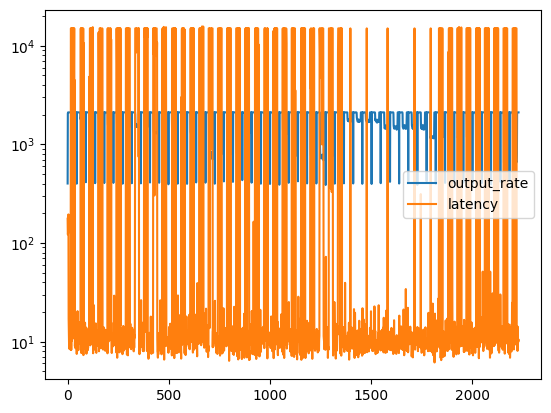

In [81]:
data.iloc[:, 1:3].plot(logy=True)

In [82]:
corr = data.corr()
correlation_list = []
for i in range(1,2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and bridge_cache-references: 0.80
Correlation between output_rate and bridge_L1-dcache-load-misses: 0.80
Correlation between output_rate and bridge_LLC-loads: 0.80
Correlation between output_rate and bridge_LLC-stores: 0.79
Correlation between output_rate and nf_router_cache-references: 0.57
Correlation between output_rate and nf_router_LLC-stores: 0.57
Correlation between output_rate and nf_router_L1-dcache-load-misses: 0.57
Correlation between output_rate and nf_router_LLC-loads: 0.56
Correlation between output_rate and payload_scan_cache-references: 0.55
Correlation between output_rate and payload_scan_LLC-stores: 0.55
Correlation between output_rate and ndpi_stats_cache-references: 0.54
Correlation between output_rate and ndpi_stats_LLC-loads: 0.54
Correlation between output_rate and payload_scan_L1-dcache-load-misses: 0.54
Correlation between output_rate and payload_scan_LLC-loads: 0.54
Correlation between output_rate and ndpi_stats_L1-dcache-load-m